In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}


In [2]:
from impor import * 

<IPython.core.display.Javascript object>


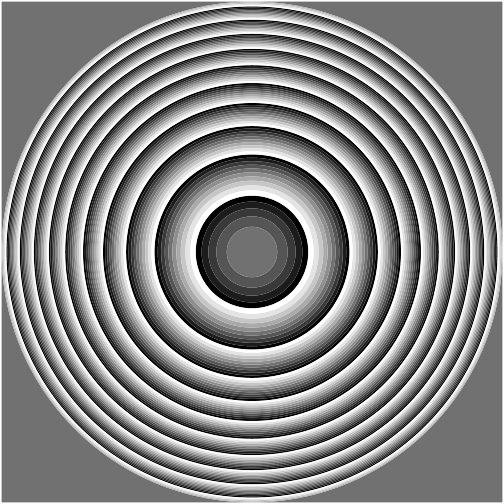

184 polygons found...
Layers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Datatypes: [0]
0.0
There is an invalid polygon at 0, but I will proceed, please check the result at the end
0.125
There is an invalid polygon at 1, but I will proceed, please check the result at the end
0.25
There is an invalid polygon at 2, but I will proceed, please check the result at the end
0.375
There is an invalid polygon at 3, but I will proceed, please check the result at the end
0.5
There is an invalid polygon at 4, but I will proceed, please check the result at the end
0.625
There is an invalid polygon at 5, but I will proceed, please check the result at the end
0.75
There is an invalid polygon at 6, but I will proceed, please check the result at the end
0.875
There is an invalid polygon at 7, but I will proceed, please check the result at the end
1.0
There is an invalid polygon at 8, but I will proceed, please check the result at the end
1.125
There is an invalid polygon at 9, but I will proceed, please check the 

In [3]:
infile = "fresnel_phase_mask.gds"
outfile = "fresnel_phase_mask.tiff"
n=10 

gds2img(infile, outfile, 9, verb=True)


<IPython.core.display.Javascript object>


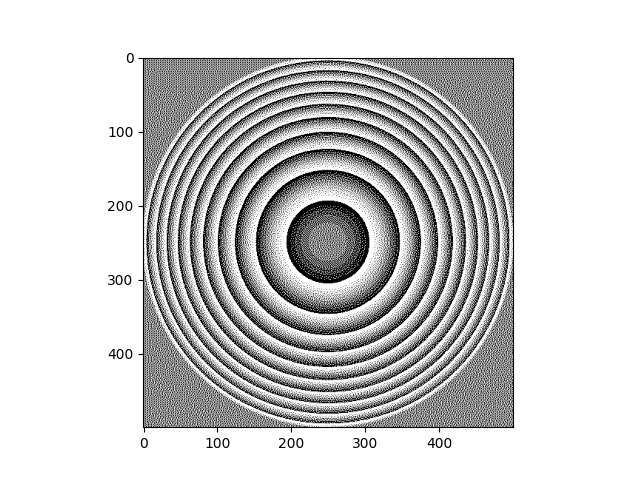

In [4]:
##Make a dithered mask from the tiff obtained from the gds 
from dither import * 

inputimg = "fresnel_phase_mask.tiff"
ditherimg = "fresnel_phase_mask_ditherx.tiff"

#make dithering using the floyd steinberg algorithm 
dither_img(inputimg, ditherimg, plotting=True)